In [219]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [242]:
# AR(1)
T = 1000
phi_1 = 0.999

In [243]:
def gen_ar(x_0 = 0.0, phi = phi_1, length = T):
    res = [x_0]
    for i in range(T-1):
        x_0 = phi_1 * x_0 + np.random.normal()
        res.append(x_0)
    return np.array(res)
    

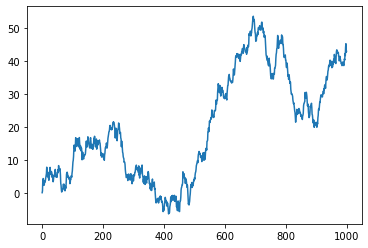

In [244]:
y = gen_ar()
plt.plot(y)
plt.show()

In [245]:
def log_like(phi, y):
    T = len(y)
    res = 0.0
    for i in range(1, T):
        res += (y[i] - phi * y[i-1]) ** 2 
    return -0.5 * res

def post_den(i, grids, y):
    diff = 0.0
    space = grids[1] - grids[0]
    N = len(grids)
    for j in range(N):
        diff += np.exp(log_like(grids[j], y) - log_like(grids[i], y)) * space if j != i else space
    res =  1.0 / diff
    return res 

In [246]:
N = 50
grids = np.linspace(0.99, 0.999, num=N)

In [247]:
grid_dens = []
for i in range(N):
    grid_dens.append(post_den(i, grids, y))

In [248]:
# Laplace approx 
def laplace(y):
    fisher_info = sum(y[1:] ** 2)
    post_mean = sum(y[1:] * y[:(T-1)]) / fisher_info
    return post_mean, np.sqrt(1 / fisher_info)

In [249]:
mu, std = laplace(y)
norm_dens = 1 /(std * np.sqrt(2 * np.pi)) * np.exp(-(grids - mu)**2 / (2 * std**2))

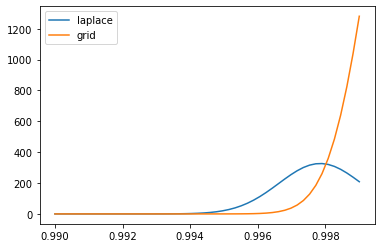

In [253]:
plt.plot(grids, norm_dens)
plt.plot(grids, grid_dens)
plt.legend(['laplace', 'grid'])
plt.show()